<a href="https://colab.research.google.com/github/monsieurupanshu/Data-Analysis-of-Astronomical-Data/blob/main/Astronomical_Tabular_Data_Visualizationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Peeking
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
126,2935,0.000870,0.09320,16.880,0,Red,M
192,2994,0.007200,0.28000,13.450,1,Red,M
184,3453,0.000621,0.07730,17.080,0,Red,M
147,14732,0.000110,0.00892,12.890,2,White,F
120,3323,0.000430,0.09120,17.160,0,Red,M
190,3462,0.005300,0.14800,11.470,1,Red,M
161,11567,251000.000000,36.00000,-6.245,4,Blue,O
82,8930,0.000560,0.00950,13.780,2,White,A
121,3531,0.000930,0.09760,19.940,0,Red,M
203,13340,0.001090,0.01160,12.900,2,Blue,B


In [3]:
# General Info about Dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
# Create a Directory to save the Visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'/content/{folder_name}/'

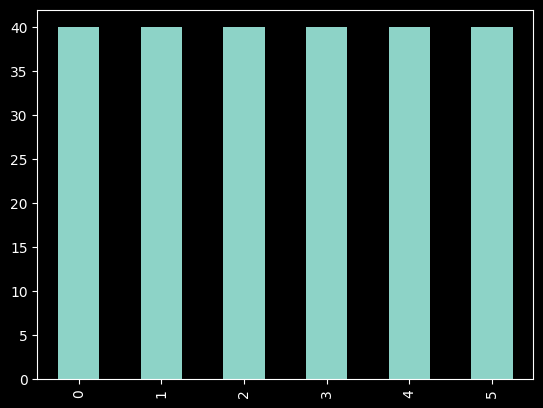

In [14]:
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

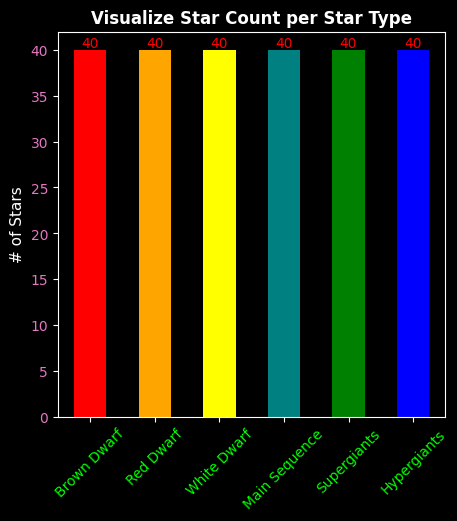

In [15]:
# Bar Chart to Visualize the Count of Stars with Respective Type
plt.figure(figsize=(5,5))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['red', 'orange', 'yellow', 'teal','green','blue'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize Star Count per Star Type', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize = 11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lime')
plt.savefig(base_dir+'barplot_star_count.png')
plt.show()

<ipython-input-24-05857e272aee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


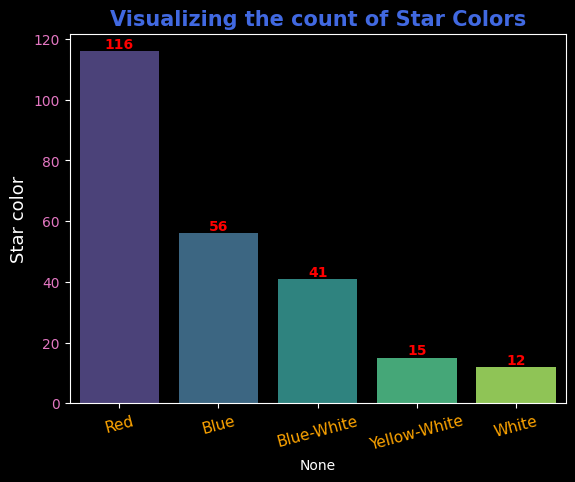

In [24]:
# Visualizing the Star Color Data
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')
for container in ax.containers:
    ax.bar_label(container, color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_colors_viz.png')
plt.show()

In [25]:
# Gist of the Data
star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


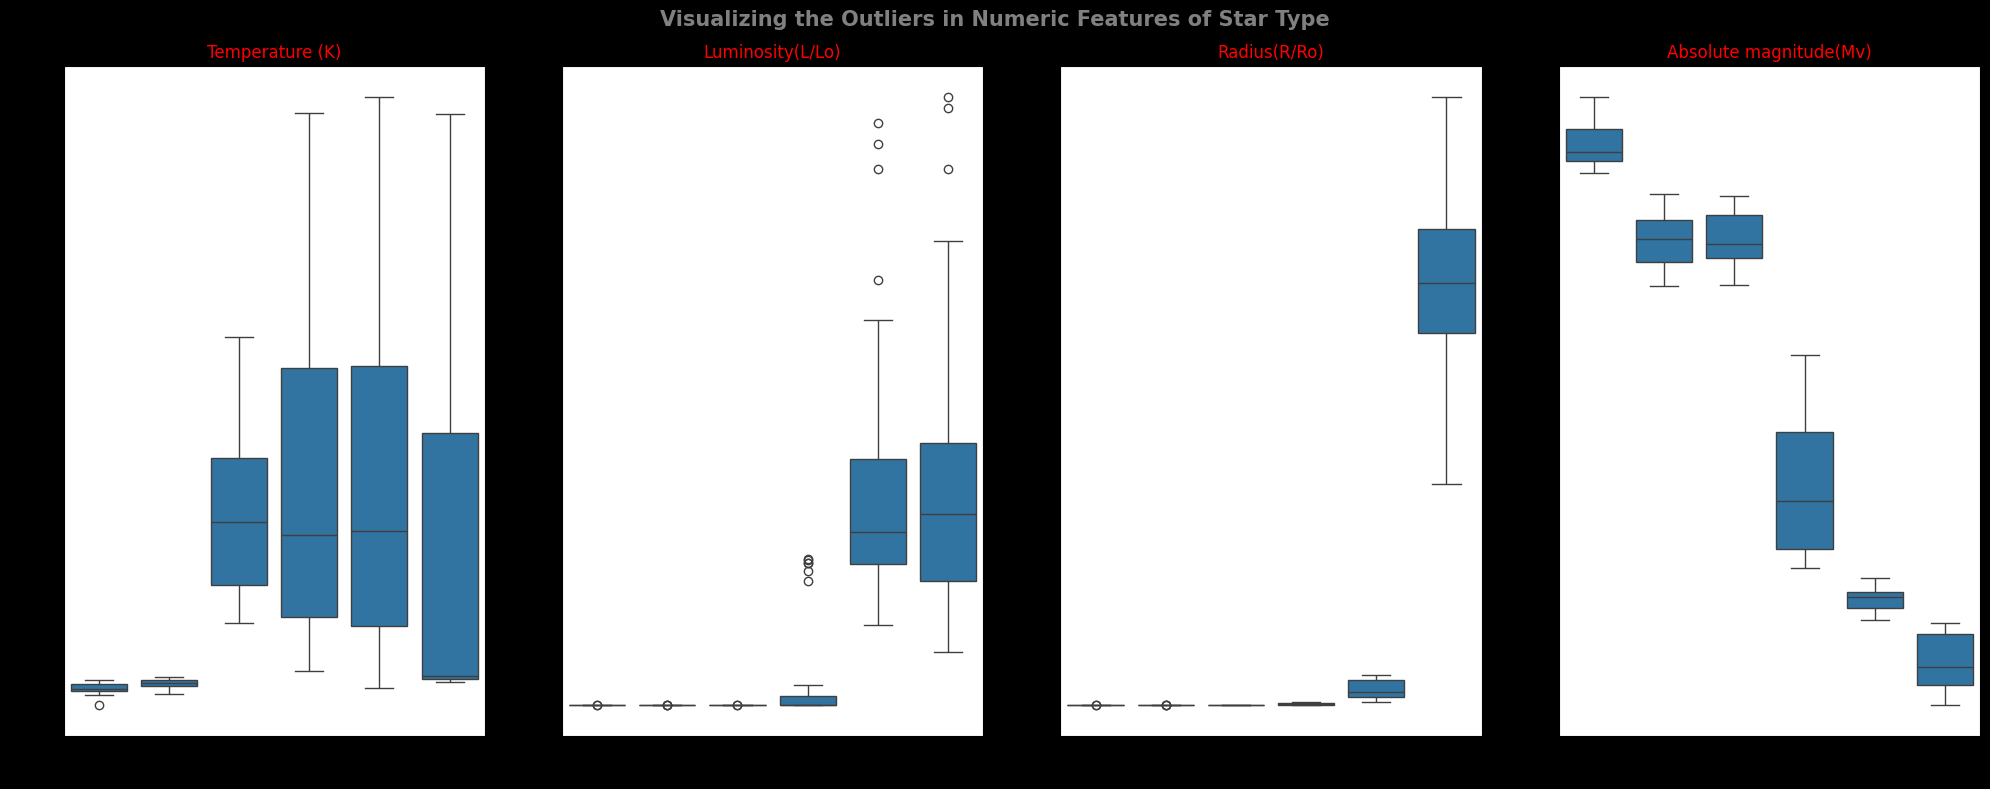

In [38]:
# Visualize Outliers
plt.figure(figsize=(20,8))
plt.style.use('dark_background')
plt.subplots_adjust(top=0.85)
plt.style.use('default')
plt.suptitle('Visualizing the Outliers in Numeric Features of Star Type',
             color='grey', weight='bold',fontsize=15)

for i in range(4):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

plt.tight_layout()
plt.savefig(base_dir+'boxplot_star-type.png')
plt.show()

In [35]:
def line_subplot(star_df, colors, i):
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:, i], color=colors[i])
  plt.title(star_df.columns[i], color='red')

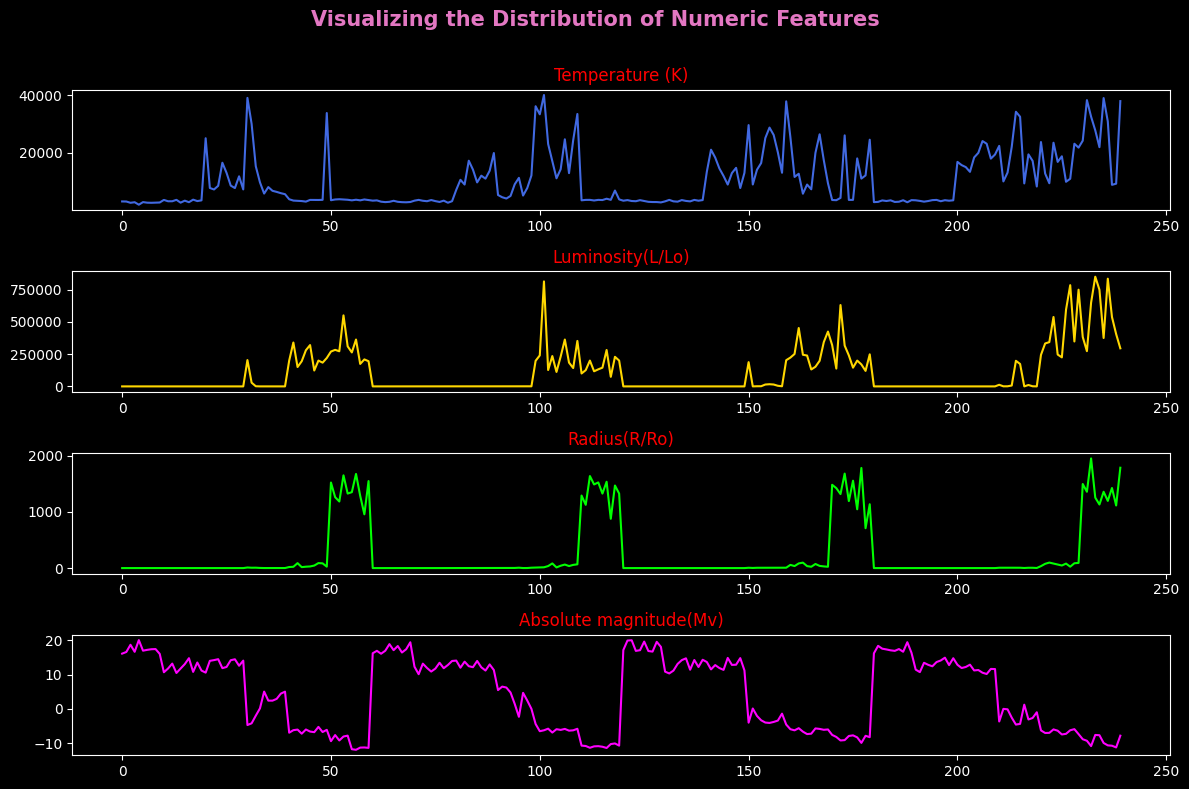

In [37]:
colors = ['royalblue', 'gold', 'lime', 'magenta']

plt.style.use('dark_background')

plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the Distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

for i in range(4):
  line_subplot(star_df, colors, i)

plt.tight_layout()

plt.savefig(base_dir+'line_subplot.png')
plt.show()